In [25]:
import pandas as pd

data = pd.read_csv("pollution_data.csv")

columns_to_clean = ["Population Staying at Home", "Population Not Staying at Home"]
for column in columns_to_clean:
    data[column] = data[column].replace(",", "", regex=True).astype(int)

columns_to_drop = data.filter(regex=r'(_min|_max|_variance|_count)$').columns
data_cleaned = data.drop(columns_to_drop, axis = 1)

print (data_cleaned.columns)

data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Day_Of_Week'] = data_cleaned['Date'].dt.day_name()

data_cleaned = data_cleaned.drop(["past_week_avg_miles"], axis=1)


data_cleaned

Index(['Date', 'City', 'County', 'State', 'Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'past_week_avg_miles',
       'latitude', 'longitude', 'o3_median', 'pressure_median', 'pm25_median',
       'humidity_median', 'temperature_median', 'dew_median', 'no2_median',
       'wind-speed_median', 'co_median', 'so2_median', 'pm10_median',
       'wind-gust_median', 'pp_feat'],
      dtype='object')


,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,latitude,longitude,o3_median,...,temperature_median,dew_median,no2_median,wind-speed_median,co_median,so2_median,pm10_median,wind-gust_median,pp_feat,Day_Of_Week
0,2019-01-01,albuquerque,bernalillo,NM,177171,499456,19.038463,35.107209,-106.617209,20.8,...,-5.3,NaN,4.7,1.6,1.5,NaN,18.0,3.8,0.319492,Tuesday
1,2019-01-01,atlanta,fulton,GA,283093,763811,29.295609,33.760109,-84.402826,8.0,...,14.3,NaN,6.5,0.3,2.5,0.2,14.0,1.7,23.304216,Tuesday
2,2019-01-01,austin,travis,TX,268732,976194,27.286079,30.283333,-97.750641,11.2,...,0.0,NaN,NaN,2.8,NaN,NaN,NaN,6.8,14.333042,Tuesday
3,2019-01-01,baltimore,baltimo,MD,191486,409167,12.961132,39.305833,-76.610417,19.2,...,0.0,NaN,5.6,3.4,NaN,NaN,6.0,8.5,6.403240,Tuesday
4,2019-01-01,boise,ada,ID,105237,363293,12.640954,43.604545,-116.202424,17.4,...,-4.1,NaN,NaN,0.7,4.8,0.7,5.0,2.2,0.000000,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35591,2020-12-11,seattle,king,WA,733494,1499669,50.982852,47.590794,-122.325714,9.6,...,6.4,3.0,13.0,2.5,2.9,1.5,NaN,4.5,0.000000,Friday
35592,2020-12-11,springfield,sangamon,IL,60167,135181,6.221078,39.783158,-89.641842,NaN,...,8.3,0.3,NaN,2.7,NaN,NaN,NaN,4.5,7.243005,Friday
35593,2020-12-11,staten island,richmond,NY,159253,316926,14.491843,40.588571,-74.150000,10.4,...,12.6,9.6,10.2,2.0,3.4,NaN,NaN,6.2,35.199504,Friday
35594,2020-12-11,tallahassee,leon,FL,76894,215608,8.184401,30.456000,-84.262500,4.9,...,24.0,21.0,NaN,3.3,2.0,NaN,NaN,8.3,0.927474,Friday


In [26]:
data_cleaned = data_cleaned.dropna(subset=['pm25_median'])

null_values = data_cleaned.isnull().mean()
null_values_filtered = null_values[null_values > 0] * 100 
null_values_filtered

o3_median              3.614732
pressure_median        2.578699
humidity_median        2.575852
temperature_median     2.584391
dew_median            41.839813
no2_median            33.355155
wind-speed_median      2.570160
co_median             30.562987
so2_median            58.777822
pm10_median           51.727671
wind-gust_median       3.819662
dtype: float64

In [27]:
polluant_column = ['o3_median','pm25_median', 'so2_median', 'no2_median', 'pm10_median', 'co_median']

data_cleaned['pollution_index_mean'] = data_cleaned[polluant_column].mean(axis=1)
print(data_cleaned['pollution_index_mean'])

print()

data_cleaned['pollution_index_max'] = data_cleaned[polluant_column].max(axis=1)
print(data_cleaned['pollution_index_max'])


0        14.000000
1        10.366667
2        24.600000
3        10.950000
4         8.180000
           ...    
35591    11.400000
35592    39.000000
35593     9.750000
35594    13.300000
35595    14.316667
Name: pollution_index_mean, Length: 35134, dtype: float64

0        25.0
1        31.0
2        38.0
3        19.2
4        17.4
         ... 
35591    30.0
35592    39.0
35593    15.0
35594    33.0
35595    30.0
Name: pollution_index_max, Length: 35134, dtype: float64


C:\Users\darla\AppData\Local\Temp/ipykernel_14552/2661429606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['pollution_index_mean'] = data_cleaned[polluant_column].mean(axis=1)
C:\Users\darla\AppData\Local\Temp/ipykernel_14552/2661429606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['pollution_index_max'] = data_cleaned[polluant_column].max(axis=1)


In [28]:
data_cleaned = data_cleaned.dropna()

In [29]:
from sklearn.model_selection import train_test_split

target = "pm25_median"

X = data_cleaned.drop(['Date','pollution_index_mean', 'pollution_index_max', 'o3_median','pm25_median', 'so2_median', 'no2_median', 'pm10_median', 'co_median'],axis=1)
y = data_cleaned[[target]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.count()

City                              2986
County                            2986
State                             2986
Population Staying at Home        2986
Population Not Staying at Home    2986
mil_miles                         2986
latitude                          2986
longitude                         2986
pressure_median                   2986
humidity_median                   2986
temperature_median                2986
dew_median                        2986
wind-speed_median                 2986
wind-gust_median                  2986
pp_feat                           2986
Day_Of_Week                       2986
dtype: int64

<AxesSubplot:xlabel='temperature_median', ylabel='pollution_index_mean'>

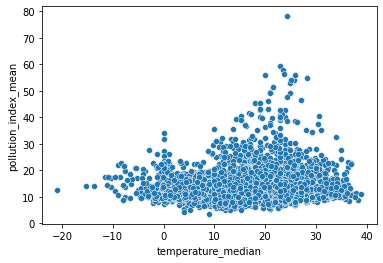

In [30]:
import seaborn as sns

sns.scatterplot(data=data_cleaned, x='temperature_median', y='pollution_index_mean')

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

numeric_features = X_train.select_dtypes(np.number).columns.tolist()
categoric_features = X_train.select_dtypes(object).columns.tolist()

numeric_pipeline = Pipeline(steps=[
  ('numeric_imputer', SimpleImputer(strategy='median')),
  ('numeric_scaler', StandardScaler())
])

categoric_pipeline = Pipeline(steps=[
  ('categoric_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
  ('categoric_encoder', OneHotEncoder(drop='first'))
])

feature_encoder = ColumnTransformer(transformers=[
  ('num', numeric_pipeline, numeric_features),
  ('cat', categoric_pipeline, categoric_features)
])

feature_encoder.fit(X_train)

X_train = feature_encoder.transform(X_train)
X_test = feature_encoder.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)
print(y_train_pred[0:5])
print(y_test_pred[0:5])

[[32.11898327]
 [26.28476643]
 [14.81841094]
 [33.18835755]
 [21.00820983]]
[[34.56044123]
 [34.46990872]
 [29.25785138]
 [39.71186906]
 [18.76911195]]


In [34]:
a = model.score(X_train, y_train)
b = model.score(X_test, y_test)

print(a, b)

0.3123005464093469 0.2641731667759336
